<a href="https://colab.research.google.com/github/subashcj7/Chabot-using-tensorflow/blob/main/chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Libraries</h2>
The main libraries that are used are tensorflow2, keras , numpy and pandas

#the goal is to create a chatbot to help in the recruitment process. organization name is Pirate's. 

In [ ]:
#importing the libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM , Dense,GlobalMaxPooling1D,Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [ ]:
%%writefile content.json
{"intents":
  [
    {
      "tag":"greeting",
      "input":["hello","hi there","nice to meet you","hi, is this is the pirate's organization","any pirates here ?","hi","hey there","hey","hi there","hi, nice to meet you","hello there","anyone there ?","hello pirates","knock knock"],
      "responses":[
          "Hi. Welcome to the world's largest pirate organization - The Strawhats",
          "Hey yo, do you need help ?",
          "welcome aboard, how may I help you ?",
          "ahoy!!",
          "Hi random person, what do'ya want ?",
          "Hello my friend, How can I help you ?",
          "Ha , Glad you showed up. How are you ?"
        ]
    },
    {
      "tag":"goodbye",
      "input":["Thank you","Thanks","Thanks for the info","bye","byr bro","adios","okay bye","goodbye","see you later","i will catch you later","i will catch up later","okay i will see you later","I will talk to you later","will text you later","bye bro, I'll talk to you later","Bye brother"],
      "responses":[
          "Okay, Bye",
          "Have a nice day",
          "Adios",
          "Goodbye",
          "see you later",
          "nice conversation. bye",
          "okay. Have a nice day",
          "Take care",
          "we'll meet soon",
          "Yeah Sure, Will talk to you later",
          "Okay , Take care"
        ]
    },
    {
      "tag":"howami",
      "input":["how are you ?","I am fine , how are you ?","are you fine ?","how are things going on ?","everything going on okay ?","how's everything there ?","how's everything going on ?","is everything okay ?"],
      "responses":[
          "Yeah , am fine",
          "Everything's going on well",
          "Doing good.Thanks you are my best friend",
          "Things are Great",
          "Yeah Fine, nothing much going on in my life",
          "I am Great , wanna join the pirate's organization ?",
          "Everything's great.",
          "I am doing good. Life is boring. need to go on an adventure"
        ]
    },
    {
      "tag":"whoareyou",
    "input":["who are you ?","what are you ?","what is your name ?","are you a chatbot ?","what can I call you ?","your name ?","are you a bot ?","how do I address you ?","How do I call you"],
      "responses":[
          "I am a The Great Pirate Bot , you can call me Going Merry",
          "I am Going Merry and you could ask me questions about our organization",
          "Going Merry at your service",
          "My name is Going Merry and yes, I am the G.O.A.T",
          "You can call me TechBot and I am here to Help you",
          "My name is Going Merry and I am here to answer your questions regarding our organization. go ahead and shoot"
        ]
    },
    {
      "tag":"whereareyou",
    "input":["where are you from ?","which country are you from ?","where do you live ?","where are you ?","where do you live in ?","which place do you live in ?","where are you currently at","where do you live currently ?","you are from where","you are from ?"],
      "responses":[
          "I Live in the East Blue",
          "I am setting sail to the grand line",
          "I live in East Blue. Pretty sure you wouldn't have heard about that",
          "East Blue. That's where I live"
        ]
    },
    {
      "tag":"join",
      "input":["how to get recruited ?","how to join ?","how do i get recruited ?","How to join the strawhats ?","how do I join the straw hats ?","how to join the straw hat pirates ?","how to enroll","how to join the organization","steps to join the organization","steps to join the pirates"],
      "responses":[

        "you need to contact the nearest straw hats center once you have completed the pre-requisites",
        "contact the closest straw hat center from your location",
        "well. there are some pre-requisite and after you complete them, find the straw hat centers"

      ]
    },
    {
      "tag":"whereisthecenter",
      "input":["where is the straw hat center located ?","location of the straw hat center ?","strawhat center's location ?","where can I find the strawhat center ?","where can I find the strawhat center ?"],
      "responses":[

        "That's up to you. use your skills",
        "They are present all over the city you live in. Find them on your own. I can't give any more information",
        "there are a lot of straw hat centers in the city you are in. find them."
      ]
    },
    {
      "tag":"prerequisites",
      "input":["what are the job requirements ?","what are the pre requisites ?","what are the pre-requisites ?","tell me about the pre-requisites","tell me more about the pre requisites","give more details about the pre-requisites","What are the requirements"," what's the basic requirements","what are the basic skills to get recruited ?"],
      "responses":[
        "you gotta master the art of swordfight or master Cooking and become a furious cook or you have to be the best navigator in the entire world or you need to be as strong and intelligent as god usop",
        "swordsman, a medical reindeer, taekwando Cook, master navigator, simple minded monkey, highly intelligent strategist, god usop. you gotta be one of these things to pass the requirement and join the pirates"
      ]
    }
  ]
}

Writing content.json


<h2> Importing the Data </h2>

The data is stored in a json file, which can be imported and used as a pandas dataframe.
This data was manually created by me. hence, it's not that big.<br>
we all know that deep learning requires large chunks of data. but, That is not the case here. I have utilized a neural network architecture powerful enough to handle this small amount of data

In [ ]:
#importing the dataset
with open('content.json') as content:
  data1 = json.load(content)

In [ ]:
#getting all the data to lists
tags = []
inputs = []
responses={}
for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['input']:
    inputs.append(lines)
    tags.append(intent['tag'])

In [ ]:
#converting to dataframe
data = pd.DataFrame({"inputs":inputs,
                     "tags":tags})

In [ ]:
#printing the data
data

,inputs,tags
0,hello,greeting
1,hi there,greeting
2,nice to meet you,greeting
3,"hi, is this is the pirate's organization",greeting
4,any pirates here ?,greeting
...,...,...
76,tell me more about the pre requisites,prerequisites
77,give more details about the pre-requisites,prerequisites
78,What are the requirements,prerequisites
79,what's the basic requirements,prerequisites


In [ ]:
data = data.sample(frac=1)

<h2> Pre-Processing </h2>

Important pre-processing such as removing the punctuations, converting to lowercase, encoding the textual data to numerical data are done

In [ ]:
#removing punctuations
import string
data['inputs'] = data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: ''.join(wrd))
data

,inputs,tags
63,how to enroll,join
4,any pirates here,greeting
69,strawhat centers location,whereisthecenter
48,which country are you from,whereareyou
73,what are the pre requisites,prerequisites
...,...,...
40,what is your name,whoareyou
57,how to get recruited,join
15,thanks,goodbye
22,see you later,goodbye


In [ ]:
#tokenize the data
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])
#apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

#encoding the outputs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

Tensorflow's tokenizer assigns a unique token to each distinct word. and padding is done to get all the data to the same length so as to send it to an rnn layer

In [ ]:
input_shape = x_train.shape[1]
print(input_shape)

8


In [ ]:
#define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length = le.classes_.shape[0]
print("output length: ",output_length)

number of unique words :  96
output length:  8


<h2>Neural Network</h2>

The Network consist of an embedding layer which is one of the most powerful things in the field of natural language processing. the outputs of the embedding layer is the input of the reccurent layer with lstm gate. then, the output is flattened and a regular dense layer is used with a softmax activation function.

The main part is the embedding layer which gives has a corresponding vector for each word in the dataset

In [ ]:
#creating the model

i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length,activation="softmax")(x)
model  = Model(i,x)

In [ ]:
#compiling the model
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [ ]:
#training the model
train = model.fit(x_train,y_train,epochs=200)

Epoch 1/200
3/3 [==============================] - 3s 13ms/step - loss: 2.0780 - accuracy: 0.0864
Epoch 2/200
3/3 [==============================] - 0s 7ms/step - loss: 2.0734 - accuracy: 0.2593
Epoch 3/200
3/3 [==============================] - 0s 7ms/step - loss: 2.0688 - accuracy: 0.2963
Epoch 4/200
3/3 [==============================] - 0s 7ms/step - loss: 2.0648 - accuracy: 0.2593
Epoch 5/200
3/3 [==============================] - 0s 7ms/step - loss: 2.0600 - accuracy: 0.2099
Epoch 6/200
3/3 [==============================] - 0s 7ms/step - loss: 2.0552 - accuracy: 0.1975
Epoch 7/200
3/3 [==============================] - 0s 10ms/step - loss: 2.0495 - accuracy: 0.1975
Epoch 8/200
3/3 [==============================] - 0s 8ms/step - loss: 2.0436 - accuracy: 0.1975
Epoch 9/200
3/3 [==============================] - 0s 7ms/step - loss: 2.0371 - accuracy: 0.1975
Epoch 10/200
3/3 [==============================] - 0s 8ms/step - loss: 2.0298 - accuracy: 0.1975
Epoch 11/200
3/3 [=========

<h2> Model Analysis </h2>

The model got a perfect accuracy of 100%. 

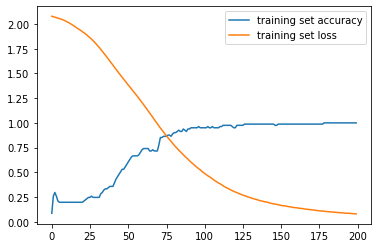

In [ ]:
#plotting model accuracy
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

<h2> Testing </h2>

I have also tested the model in a way to mimic a human interacting with a bot and got positive results. however, This was very simple because of the tiny amount of data that I have created. but, the same model can also be used with large amount of data

In [ ]:
#chatting
import random


while True:
  texts_p = []
  prediction_input = input('You : ')

  #removing punctuation and converting to lowercase
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  #tokenizing and padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)

  #getting output from model
  output = model.predict(prediction_input)
  output = output.argmax()

  #finding the right tag and predicting
  response_tag = le.inverse_transform([output])[0]
  print("Going Merry : ",random.choice(responses[response_tag]))
  if response_tag == "goodbye":
    break

You : how are you ? 
Going Merry :  Things are Great
You : how are you ?
Going Merry :  Yeah Fine, nothing much going on in my life
You : how are you ?
Going Merry :  Everything's great.
You : hi
Going Merry :  Hey yo, do you need help ?
You : yes
Going Merry :  Hello my friend, How can I help you ?
You : what are the job requirements ?
Going Merry :  you gotta master the art of swordfight or master Cooking and become a furious cook or you have to be the best navigator in the entire world or you need to be as strong and intelligent as god usop
You : location 
Going Merry :  Hello my friend, How can I help you ?
You : location of your office
Going Merry :  Things are Great
You : who are you ?
Going Merry :  I am a The Great Pirate Bot , you can call me Going Merry
You : how are you ?
Going Merry :  Everything's going on well


<h2> Conclusion </h2>
So, This is the Chatbot that I have created with tensorflow2 utilizing the power of embedding matrix.<br>
This was created in memory og <b> Going Merry </b> , a ship from a manga called "One Piece" which revolves around the story of 5 pirates. 